In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
%config InlineBackend.figure_format = 'retina'

In [42]:
data = pd.read_csv("train.csv")

In [43]:
data.head(5)

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [44]:
data.shape

(19579, 3)

In [45]:
data['author'].value_counts()

EAP    7900
MWS    6044
HPL    5635
Name: author, dtype: int64

In [46]:
EAP_len = data[data['author']=='EAP'].shape
HPL_len = data[data['author']=='HPL'].shape
MWS_len = data[data['author']=='MWS'].shape

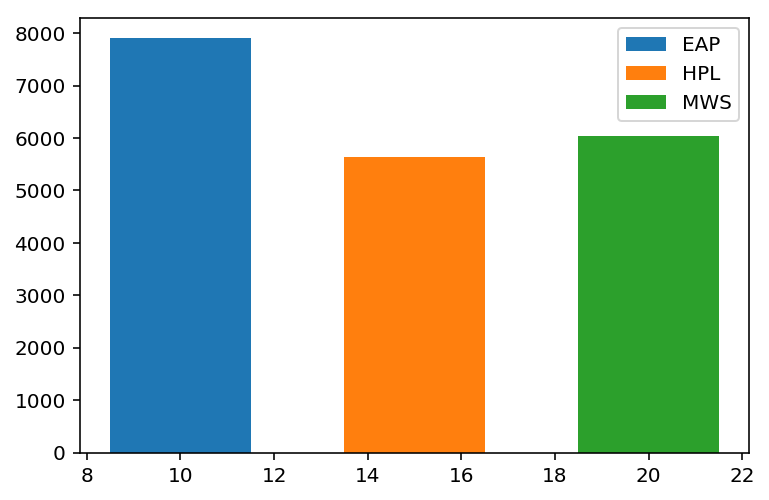

In [47]:
plt.bar(10,EAP_len,3, label ="EAP")
plt.bar(15,HPL_len,3, label ="HPL")
plt.bar(20,MWS_len,3, label ="MWS")
plt.legend()

In [48]:
import re
def remove_punc(text):
    letters_only = re.sub("[^a-zA-Z]"," ", text)
    return letters_only

In [49]:
data['text'] = data['text'].apply(remove_punc)
data.head(10)

,id,text,author
0,id26305,This process however afforded me no means of...,EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,In his left hand was a gold snuff box from wh...,EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,Finding nothing else not even gold the Super...,HPL
5,id22965,A youth passed in solitude my best years spen...,MWS
6,id09674,The astronomer perhaps at this point took r...,EAP
7,id13515,The surcingle hung in ribands from my body,EAP
8,id19322,I knew that you could not say to yourself ste...,EAP
9,id00912,I confess that neither the structure of langua...,MWS


In [50]:
data['text'][78]

'Each people looked on the coming struggle as that which would be to a great degree decisive  as  in case of victory  the next step would be the siege of Constantinople by the Greeks '

In [51]:
sw = stopwords.words("english")
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [52]:
len(sw)

179

In [53]:
def remove_sw(text):
    text = [word.lower() for word in text.split() if word not in sw]
    return " ".join(text)

In [54]:
data['text'] = data['text'].apply(remove_sw)
data['text'][0]

'this process however afforded means ascertaining dimensions dungeon i might make circuit return point whence i set without aware fact perfectly uniform seemed wall'

In [55]:
vectorizer = CountVectorizer(analyzer= "word", tokenizer= None, preprocessor= None, stop_words= None, max_features=5000)
vectorizer.fit(data['text'])
dictionary = vectorizer.vocabulary_.items()

In [56]:
vocab= []
count=[]
for key, value in dictionary:
    vocab.append(key)
    count.append(value)


In [57]:
vocab_bef_stem = pd.Series(count, index=vocab)
print(vocab_bef_stem.head(20))

this          4456
process       3396
however       2183
afforded        94
means         2703
dimensions    1197
dungeon       1332
might         2754
make          2646
circuit        731
return        3674
point         3282
whence        4851
set           3888
without       4915
aware          359
fact          1609
perfectly     3195
seemed        3845
wall          4781
dtype: int64


In [58]:
top = vocab_bef_stem.head(20)
print(top)

this          4456
process       3396
however       2183
afforded        94
means         2703
dimensions    1197
dungeon       1332
might         2754
make          2646
circuit        731
return        3674
point         3282
whence        4851
set           3888
without       4915
aware          359
fact          1609
perfectly     3195
seemed        3845
wall          4781
dtype: int64


In [59]:
stemmer = SnowballStemmer("english")
def stem(text):
    text =  [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [60]:
data['text'] = data['text'].apply(stem)
data['text'][0]

'this process howev afford mean ascertain dimens dungeon i might make circuit return point whenc i set without awar fact perfect uniform seem wall'

In [61]:
tfid_vec = TfidfVectorizer("english")
tfid_vec.fit(data['text'])
dictionary = tfid_vec.vocabulary_.items()

In [62]:
vocab= []
count=[]
for key, value in dictionary:
    vocab.append(key)
    count.append(value)


In [63]:
vocab_bef_stem = pd.Series(count, index=vocab)
print(vocab_bef_stem.head(20))

this         13159
process      10239
howev         6325
afford         220
mean          8103
ascertain      777
dimens        3575
dungeon       4010
might         8265
make          7915
circuit       2325
return       10962
point         9967
whenc        14732
set          11666
without      14880
awar           960
fact          4716
perfect       9648
uniform      13926
dtype: int64


In [64]:
def length(text):
    return len(text)

data['length'] = data['text'].apply(length)

In [65]:
data.head(20)

,id,text,author,length
0,id26305,this process howev afford mean ascertain dimen...,EAP,145
1,id17569,it never occur fumbl might mere mistak,HPL,38
2,id11008,in left hand gold snuff box caper hill cut man...,EAP,116
3,id27763,how love spring as look windsor terrac sixteen...,MWS,144
4,id12958,find noth els even gold superintend abandon at...,HPL,102
5,id22965,a youth pass solitud best year spent gentl fem...,MWS,275
6,id09674,the astronom perhap point took refug suggest n...,EAP,79
7,id13515,the surcingl hung riband bodi,EAP,29
8,id19322,i knew could say stereotomi without brought th...,EAP,275
9,id00912,i confess neither structur languag code govern...,MWS,82


In [66]:
EAP_data = data[data['author']=='EAP']
HPL_data = data[data['author']=='HPL']
MWS_data = data[data['author']=='MWS']

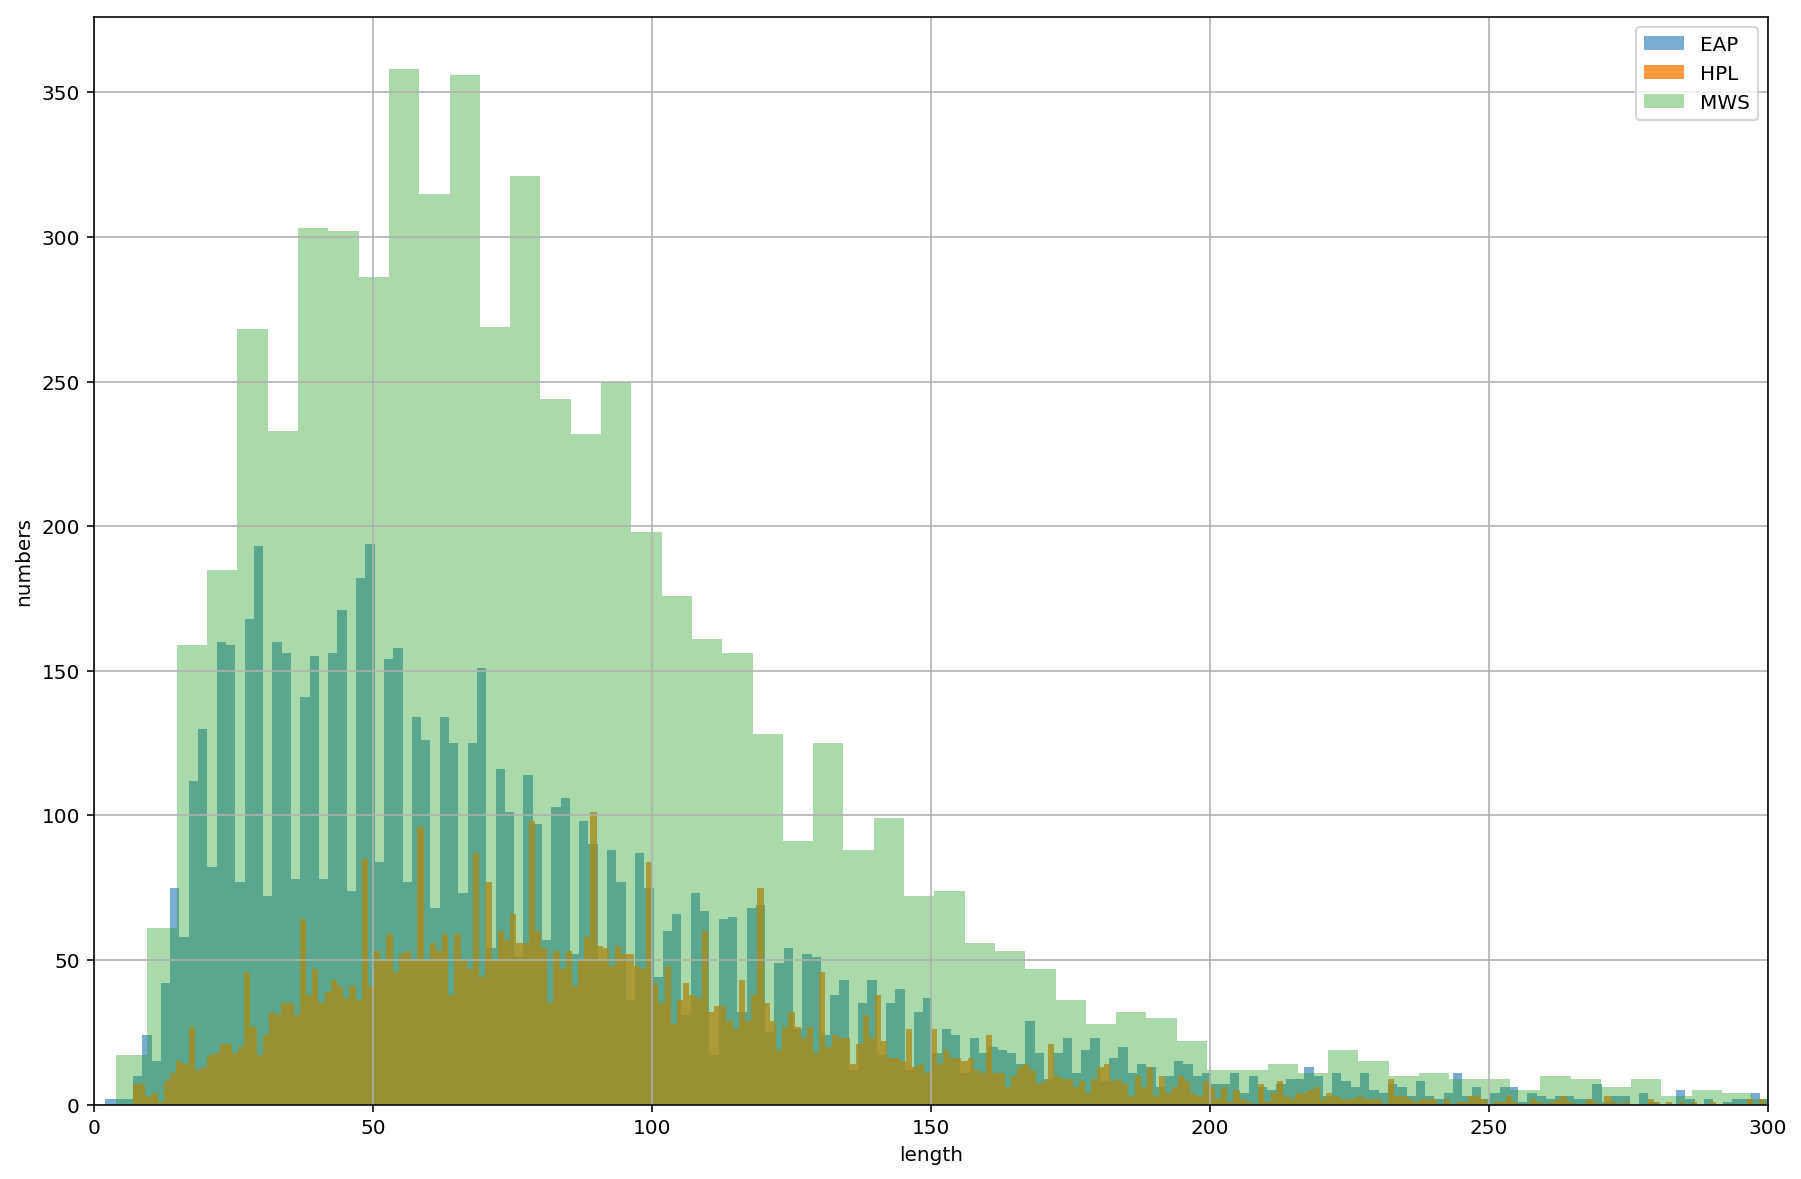

In [67]:
plt.figure(figsize=(15,10))
plt.hist(EAP_data['length'], alpha=0.6, bins=500, label='EAP')
plt.hist(HPL_data['length'], alpha= 0.8, bins=500, label='HPL')
plt.hist(MWS_data['length'], alpha = 0.4, bins=500,label='MWS')
plt.xlim(0,300)
plt.grid()
plt.legend()
plt.xlabel('length')
plt.ylabel('numbers')
plt.show()

In [68]:
#top words of each author
EAP_vectorizer = TfidfVectorizer("english")
EAP_vectorizer.fit(EAP_data['text'])
dictionary = EAP_vectorizer.vocabulary_.items()
vocab= []
count=[]
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
EAP_series = pd.Series(count, index=vocab)
print(EAP_series.head(20))

this         8598
process      6709
howev        4191
afford        159
mean         5319
ascertain     491
dimens       2347
dungeon      2652
might        5424
make         5207
circuit      1480
return       7203
point        6520
whenc        9545
set          7638
without      9642
awar          616
fact         3141
perfect      6322
uniform      9058
dtype: int64


In [69]:
HPL_vectorizer = TfidfVectorizer("english")
HPL_vectorizer.fit(HPL_data['text'])
dictionary = HPL_vectorizer.vocabulary_.items()
vocab= []
count=[]
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
HPL_series = pd.Series(count, index=vocab)
print(HPL_series.head(20))

it             4294
never          5348
occur          5516
fumbl          3249
might          5035
mere           4995
mistak         5091
find           3001
noth           5439
els            2597
even           2751
gold           3452
superintend    7857
abandon           0
attempt         544
perplex        5900
look           4741
occasion       5512
steal          7638
counten        1787
dtype: int64


In [70]:
MWS_vectorizer = TfidfVectorizer("english")
MWS_vectorizer.fit(MWS_data['text'])
dictionary = MWS_vectorizer.vocabulary_.items()
vocab= []
count=[]
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
MWS_series = pd.Series(count, index=vocab)
print(MWS_series.head(20))

how          3001
love         3673
spring       5755
as            373
look         3659
windsor      6988
terrac       6123
sixteen      5565
fertil       2328
counti       1331
spread       5752
beneath       598
speckl       5710
happi        2813
cottag       1320
wealthier    6892
town         6282
former       2478
year         7089
heart        2870
dtype: int64


In [73]:
tfid_matrix = tfid_vec.transform(data['text'])
array = tfid_matrix.todense()

MemoryError: 

In [74]:
df = pd.DataFrame(array)
df1 = pd.DataFrame(array)
df1.head(10)

,0,1,2,3,4,5,6,7,8,9,...,15088,15089,15090,15091,15092,15093,15094,15095,15096,15097
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.266321,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
df['output'] = data['author']
df['id'] = data['id']
df.head()
ls =[2,3]
type(df[ls])

pandas.core.frame.DataFrame

In [76]:
features = []
features = df.columns.tolist()
output = 'output'
# removing the output and the id from features
features.remove(output)
features.remove('id')


In [77]:
#importing libraries
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import GridSearchCV

In [78]:
alpha_list1 = np.linspace(0.006, 0.1,20)
alpha_list1 = np.around(alpha_list1, decimals= 4)
alpha_list1

array([0.006 , 0.0109, 0.0159, 0.0208, 0.0258, 0.0307, 0.0357, 0.0406,
       0.0456, 0.0505, 0.0555, 0.0604, 0.0654, 0.0703, 0.0753, 0.0802,
       0.0852, 0.0901, 0.0951, 0.1   ])

In [79]:
parameter_grid = [{"alpha":alpha_list1}]

In [65]:
classifier1 = MultinomialNB()
param_distributions = dict(loss=loss,
                           penalty=penalty,
                           alpha=alpha,
                           learning_rate=learning_rate,
                           class_weight=class_weight,
                           eta0=eta0)

random = RandomizedSearchCV(ramestimator=sgd,
                            param_distributions=param_distributions,
                            scoring='roc_auc',
                            verbose=1, n_jobs=-1,
                            n_iter=1000)
gridsearch1 = GridSearchCV(classifier1,parameter_grid, scoring = 'neg_log_loss', cv = 4, n_jobs=1)
gridsearch1.fit(df1, df[output])

MemoryError: 

In [135]:
results1 = pd.DataFrame()
# collect alpha list
results1['alpha'] = gridsearch1.cv_results_['param_alpha'].data
# collect test scores
results1['neglogloss'] = gridsearch1.cv_results_['mean_test_score'].data

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'